#KERAS PROJECT -> 4

#LOAN STATUS PREDICTION PROJECT

I will be using a subset of the LendingClub DataSet obtained from Kaggle. Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), i will build a model that can predict wether or nor a borrower will pay back their loan. This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.
The "loan_status" column contains our label.

#COLUMN INFORMATION

1. loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. term: The number of payments on the loan. Values are in months and can be either 36 or 60.
3. int_rate: Interest Rate on the loan
4. installment: The monthly payment owed by the borrower if the loan originates.
5. grade: LC assigned loan grade
6. sub_grade: LC assigned loan subgrade
7. emp_title: The job title supplied by the Borrower when applying for the loan.
8. emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
10. annual_inc: The self-reported annual income provided by the borrower during registration.
11. verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified
12. issue_d: The month which the loan was funded
13. loan_status: Current status of the loan
14.	purpose: A category provided by the borrower for the loan request.
15. title: The loan title provided by the borrower
16. zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application.
17. addr_state: The state provided by the borrower in the loan application
18. dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
19. earliest_cr_line: The month the borrower's earliest reported credit line was opened
20. open_acc: The number of open credit lines in the borrower's credit file.
21. pub_rec: Number of derogatory public records
22. revol_bal: Total credit revolving balance
23. revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
24. total_acc: The total number of credit lines currently in the borrower's credit file
25. initial_list_status: The initial listing status of the loan. Possible values are – W, F
26. application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers
27.	mort_acc: Number of mortgage accounts.
28. pub_rec_bankruptcies: Number of public record bankruptcies

#IMPORTS

In [615]:
#Import Numpy And Pandas
import numpy as np
import pandas as pd

In [617]:
#Import Matplotlib And Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#THE DATA

In [620]:
#Read the data
df = pd.read_csv('lending_club_loan_two.csv')

In [622]:
#Head of df
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [624]:
#Info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [626]:
#Describe on df
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


#EXPLORATORY DATA ANALYSIS

<Axes: xlabel='loan_status', ylabel='count'>

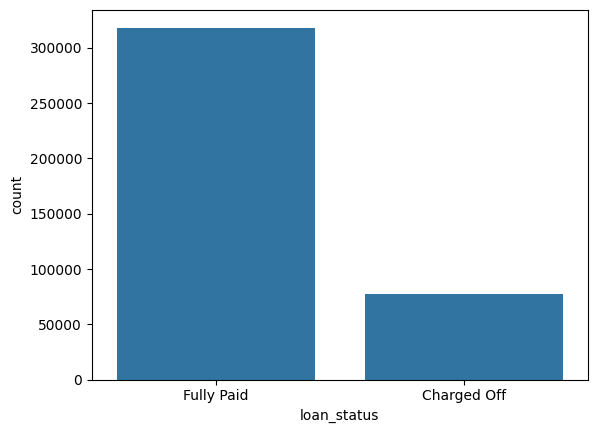

In [629]:
#Countplot of loan_status
sns.countplot(data=df,x='loan_status')

<Axes: xlabel='loan_amnt', ylabel='Count'>

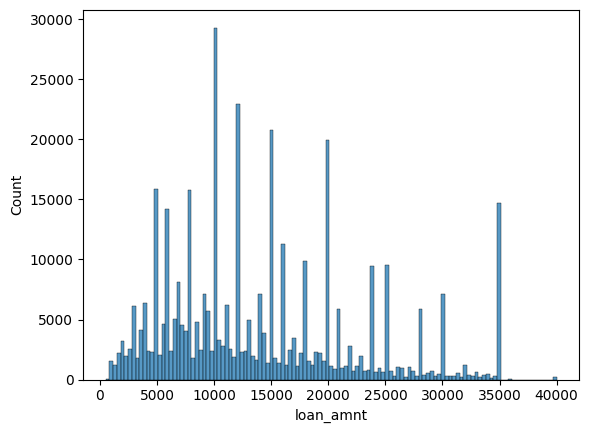

In [631]:
#Histogram of loan_amnt column
sns.histplot(df['loan_amnt'])

In [633]:
#Correlation with other features
df.drop(['term','grade', 'sub_grade','emp_title', 'emp_length', 'home_ownership','verification_status', 'issue_d', 'loan_status', 'purpose', 'title','earliest_cr_line','initial_list_status', 'application_type','address'],axis=1).corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

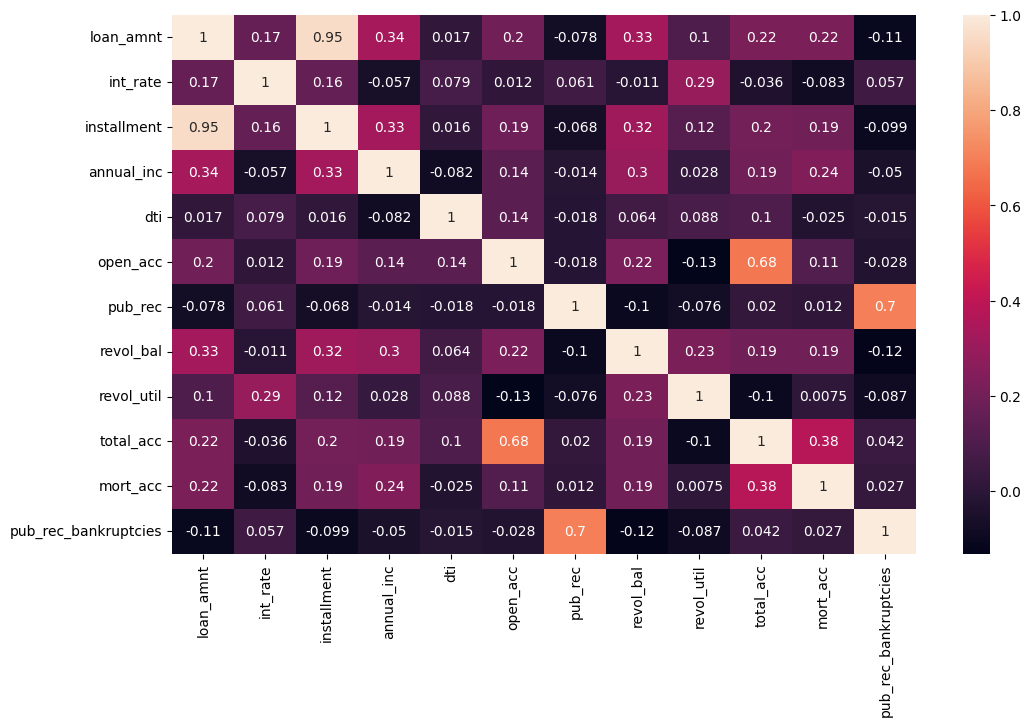

In [635]:
#Heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.drop(['term','grade', 'sub_grade','emp_title', 'emp_length', 'home_ownership','verification_status', 'issue_d', 'loan_status', 'purpose', 'title','earliest_cr_line','initial_list_status', 'application_type','address'],axis=1).corr(),annot=True)

Conclusion -> Perfect correlation with installment feature

<Axes: xlabel='installment', ylabel='loan_amnt'>

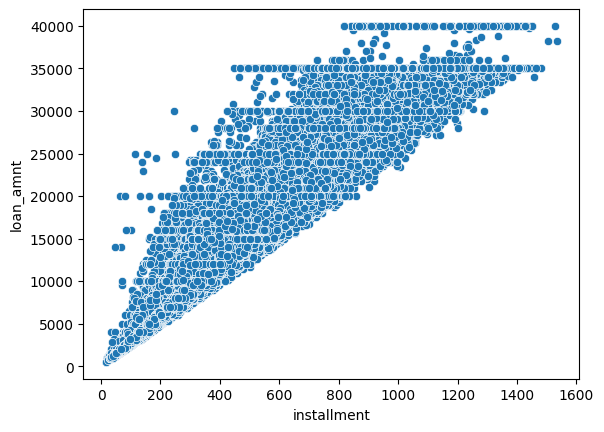

In [638]:
#Scatterplot b/w loan_amnt vs installment
sns.scatterplot(data=df,y='loan_amnt',x='installment')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

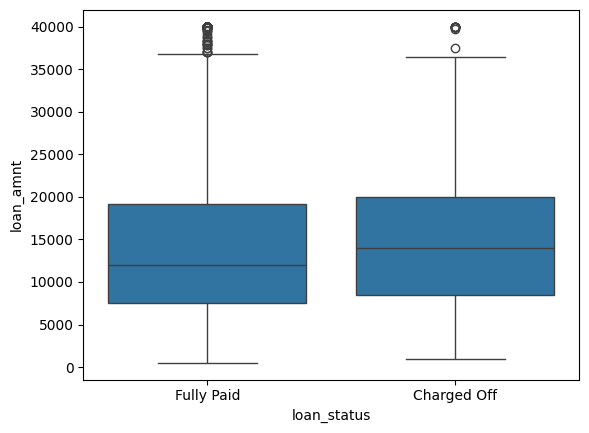

In [639]:
#Boxplot showing the relationship between the loan_status and the Loan Amount
sns.boxplot(data=df,y='loan_amnt',x='loan_status')

In [641]:
#Summary statistics for the loan amount, grouped by the loan_status
df.groupby(by='loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [644]:
#Unique possible grades and subgrades
print('Unique Grades ->',list(df['grade'].unique()))
print('\n')
print('Unique Sub_grades ->',list(df['sub_grade'].unique()))

Unique Grades -> ['B', 'A', 'C', 'E', 'D', 'F', 'G']


Unique Sub_grades -> ['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4', 'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5', 'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4', 'F2', 'G3']


<Axes: xlabel='grade', ylabel='count'>

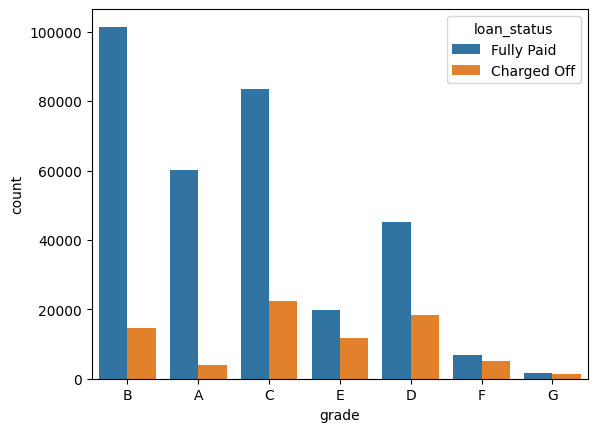

In [646]:
#Countplot per grade and hue based off loan_status label
sns.countplot(data=df,x='grade',hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

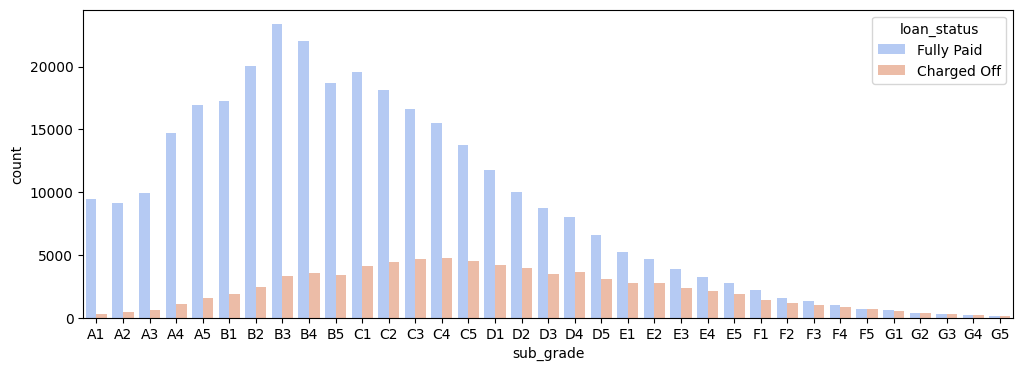

In [647]:
#Countplot per sub_grade and hue based off loan_status label
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(data=df,x='sub_grade',order=subgrade_order,hue='loan_status',palette='coolwarm')

Conclusion -> F and G loans don't get paid that often.

<Axes: xlabel='sub_grade', ylabel='count'>

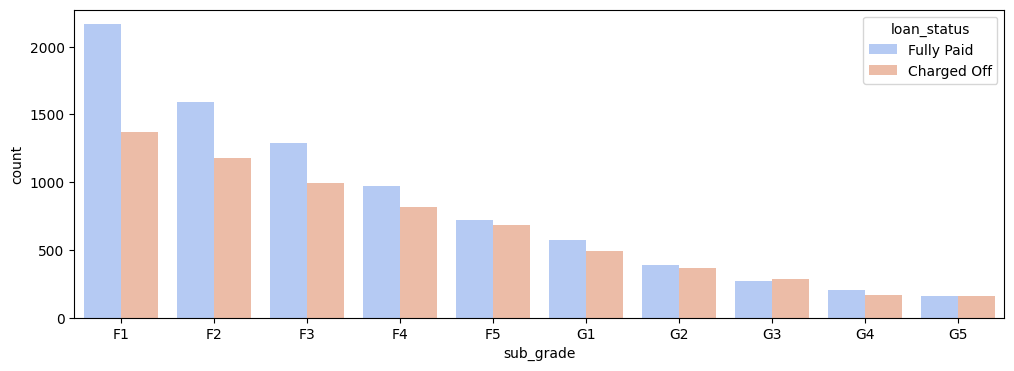

In [651]:
#Isolate F and G and countplot just for these subgrades.
plt.figure(figsize=(12,4))
subgrade_order = sorted(df[(df['grade']=='F')|(df['grade']=='G')]['sub_grade'].unique())
sns.countplot(data=df[(df['grade']=='F')|(df['grade']=='G')],x='sub_grade',order=subgrade_order,hue='loan_status',palette='coolwarm')

In [653]:
#'load_repaid' column which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"
def if_repaid(n):
    if(n=='Fully Paid'):
        return 1
    else:
        return 0
df['loan_repaid']=df['loan_status'].apply(if_repaid)

<Axes: >

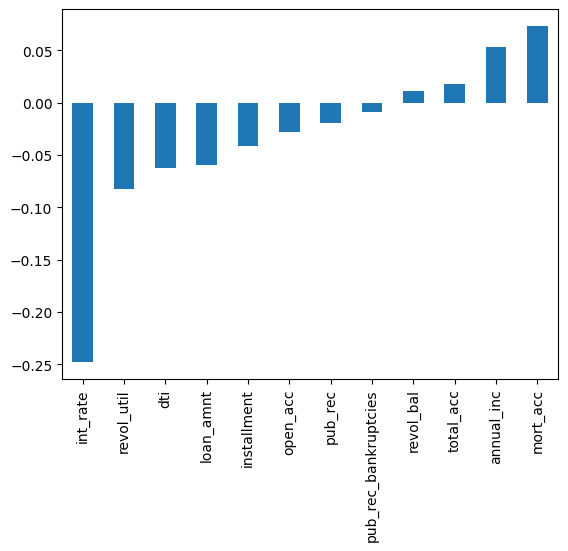

In [655]:
#Bar plot showing the correlation of the numeric features to the new loan_repaid column. 
df.drop(['term','grade', 'sub_grade','emp_title', 'emp_length', 'home_ownership','verification_status', 'issue_d', 'loan_status', 'purpose', 'title','earliest_cr_line','initial_list_status', 'application_type','address'],axis=1).corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

#DATA PREPROCESSING

In [658]:
#Dataframe shape
df.shape

(396030, 28)

In [660]:
#Series that displays the total count of missing values per column.
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [662]:
#Find percentage of the null values in all columns of Dataframe
for i in range(28):
    print(df.columns[i],'->',list((df.isnull().sum().values/396030)*100)[i])

loan_amnt -> 0.0
term -> 0.0
int_rate -> 0.0
installment -> 0.0
grade -> 0.0
sub_grade -> 0.0
emp_title -> 5.7892078882912905
emp_length -> 4.621114562028129
home_ownership -> 0.0
annual_inc -> 0.0
verification_status -> 0.0
issue_d -> 0.0
loan_status -> 0.0
purpose -> 0.0
title -> 0.4434007524682474
dti -> 0.0
earliest_cr_line -> 0.0
open_acc -> 0.0
pub_rec -> 0.0
revol_bal -> 0.0
revol_util -> 0.06969169002348306
total_acc -> 0.0
initial_list_status -> 0.0
application_type -> 0.0
mort_acc -> 9.543468929121532
pub_rec_bankruptcies -> 0.13509077595131683
address -> 0.0
loan_repaid -> 0.0


In [664]:
#Count of unique employment job titles
df['emp_title'].nunique()

173105

In [666]:
#Conclusion -> Because of too many emp_titles we are going to drop it
df=df.drop('emp_title',axis=1)

<Axes: xlabel='emp_length', ylabel='count'>

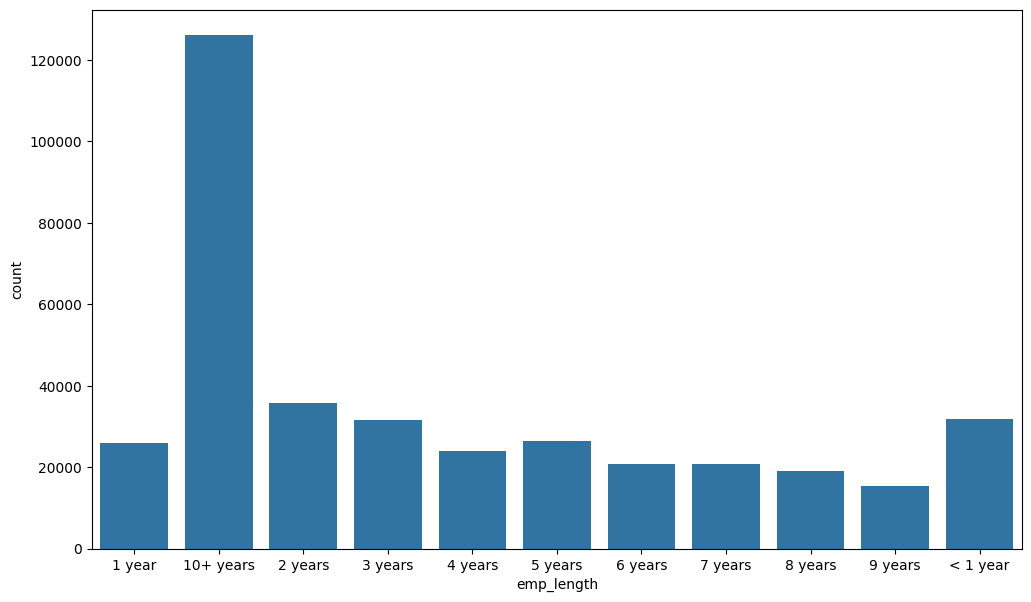

In [668]:
#Count plot of the emp_length feature column.Sort the order of the values.
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='emp_length',order=sorted(df['emp_length'].dropna().unique()))

<Axes: xlabel='emp_length', ylabel='count'>

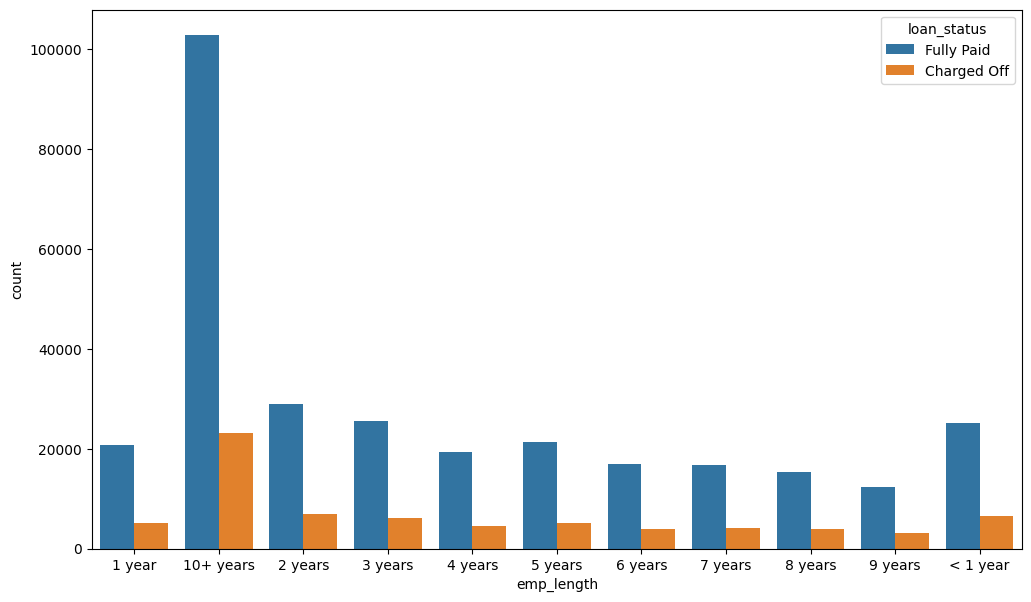

In [670]:
#In above countplot , add hue based off loan_status
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='emp_length',order=sorted(df['emp_length'].dropna().unique()),hue='loan_status')

In [672]:
#Percent of people per employment category didn't pay back their loan.
ll = []
try: 
    unique_emp_length = df['emp_length'].unique()
    for i in unique_emp_length:
        xx = df[df['emp_length']==i]['loan_repaid'].value_counts()[0]
        yy = df[df['emp_length']==i]['loan_repaid'].value_counts()[1]
        ll.append(xx/yy)
except:
    KeyError
my_series = pd.Series(data = ll,index=df['emp_length'].unique()[:-1])
my_series

10+ years    0.225770
4 years      0.238213
< 1 year     0.260830
6 years      0.233341
9 years      0.250735
2 years      0.239560
3 years      0.242593
8 years      0.249625
7 years      0.241887
5 years      0.237911
1 year       0.248649
dtype: float64

<Axes: >

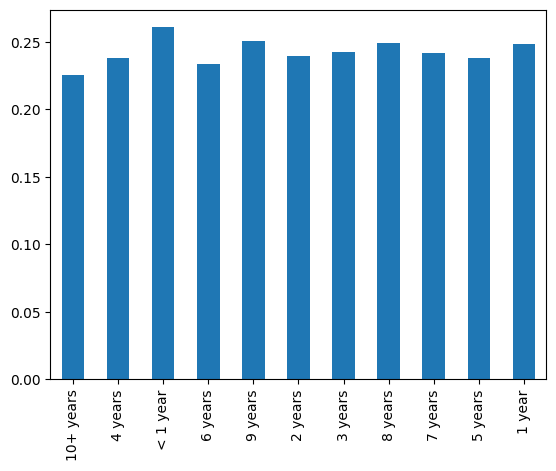

In [674]:
#Barplot of above series
my_series.plot(kind='bar')

In [676]:
#Conclusion -> Charge off rates are extremely similar across all employment lengths
#so drop emp_length column
df=df.drop('emp_length',axis=1)

In [678]:
#Both columns are similar
df[['title','purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


In [680]:
#Drop title column
df = df.drop('title',axis=1)

In [682]:
#mort_acc represents number of mortgage accounts.

In [684]:
#Value counts of the mort_acc column
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [686]:
#Correlation of other features with mort_acc
df.drop(['term','grade', 'sub_grade', 'home_ownership','verification_status', 'issue_d', 'loan_status', 'purpose','earliest_cr_line','initial_list_status', 'application_type','address'],axis=1).corr().drop('mort_acc')['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

Conclusion -> total_acc correlates most with mort_acc

In [689]:
xy = list(df['total_acc'].unique())
yz = []
for i in list(df['total_acc'].unique()):
    yz.append(df[df['total_acc']==i]['mort_acc'].mean())
my_se=pd.Series(data=yz,index=xy)
my_se

25.0     1.900506
27.0     2.103573
26.0     1.987414
13.0     0.722124
43.0     2.997056
           ...   
96.0     3.000000
98.0     0.500000
100.0    4.000000
116.0    4.500000
103.0    0.000000
Length: 118, dtype: float64

In [691]:
#Fill in missing values in mort_acc with above values
def fill_mort_acc(x,n):
    if(np.isnan(n)):
        return my_se[x]
    else:
        return n
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [692]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [695]:
#Drop all the other null rows
df = df.dropna()

#Categorical Variables and Dummy Variables

In [698]:
#Columns that are currently non-numeric
cols = df.columns
for i in range(0,len(list(df.iloc[0].values))):
    if isinstance(list(df.iloc[0].values)[i], str):
        print(cols[i])

term
grade
sub_grade
home_ownership
verification_status
issue_d
loan_status
purpose
earliest_cr_line
initial_list_status
application_type
address


#Let's handle these features one by one

#1. Term feature

In [702]:
#Convert the term feature into either a 36 or 60 integer numeric data
def term_convert(n):
    if(n==' 36 months'):
        return 36
    else:
        return 60
df['term']=df['term'].apply(term_convert)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [708]:
#2. grade feature -> Grade is part of sub_grade, so just drop the grade feature
df=df.drop('grade',axis=1)

In [714]:
#3. subgrade feature -> Convert the subgrade into dummy variables

In [722]:
#Get dummies for all subgrades
myy=pd.get_dummies(df['sub_grade'],drop_first=True)
myy

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [728]:
#Convert True to 1 and false to 0
def tff(n):
    if(n):
        return 1
    else:
        return 0
for i in myy.columns:
    myy[i]=myy[i].apply(tff)
myy

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [730]:
#Concatenate 
df = pd.concat([df.drop('sub_grade',axis=1),myy],axis=1)

In [734]:
#Similarly make dummies for other columns
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)

In [740]:
#Convert True to 1 and false to 0
for i in dummies.columns:
    dummies[i]=dummies[i].apply(tff)
dummies

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
396026,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396027,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396028,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [742]:
#Concat them
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [744]:
#4. home_ownership column 
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
for i in dummies.columns:
    dummies[i]=dummies[i].apply(tff)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

5.Make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column

In [756]:
#Make zip code column
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [758]:
#Dummies
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
for i in dummies.columns:
    dummies[i]=dummies[i].apply(tff)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [760]:
#6. drop issue_id column
df = df.drop('issue_d',axis=1)

In [762]:
#7. earliest_cr_line: extract year from it
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

#TRAIN TEST SPLIT

In [769]:
#Import train_test_split
from sklearn.model_selection import train_test_split

In [771]:
#Drop loan_status
df=df.drop('loan_status',axis=1)

In [773]:
#Make x and y
x = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [775]:
#Perform train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=101)

#Normalizing the Data

In [780]:
#Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [782]:
#Create an instance
scaler = MinMaxScaler()

In [784]:
#Fit scaler
scaler.fit(x_train)

MinMaxScaler()

In [786]:
#Scale x_train and x_test
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#CREATING THE MODEL

In [789]:
#Import sequential model,dense layer and dropout layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [791]:
#Create model
model = Sequential()
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [793]:
#Fit Model
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=25,batch_size=256)

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3474 - val_loss: 0.2644
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2661 - val_loss: 0.2629
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2607 - val_loss: 0.2624
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2622 - val_loss: 0.2618
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2608 - val_loss: 0.2614
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2613 - val_loss: 0.2616
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2595 - val_loss: 0.2614
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2590 - val_loss: 0.2618
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2588 - val_loss: 0.2615
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2588 - val_loss: 0.2609
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2585 - val_loss: 0.2612
Epoch 12/25
1236/1236 ━━━━━━━━

#EVALUATION

<Axes: >

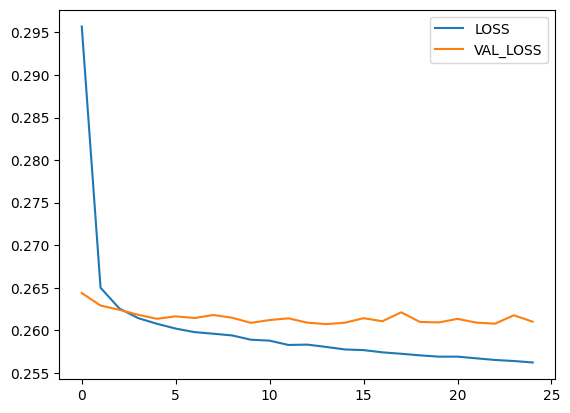

In [796]:
#Plot val_loss and loss
loss_df = pd.DataFrame()
loss_df['LOSS']=model.history.history['loss']
loss_df['VAL_LOSS']=model.history.history['val_loss']
loss_df.plot()

In [798]:
#Take predictions
predictions = model.predict(x_test)
predictions

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [8.4502965e-01],
       [9.9999726e-01],
       [1.0561666e-22]], dtype=float32)

In [800]:
#Get 0s and 1s
predicted_classes = (predictions > 0.5).astype("int32")
predicted_classes

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [802]:
#Import classification_report and confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [810]:
#Print confusion matrix
print(confusion_matrix(y_test,predicted_classes))

[[ 7165  8493]
 [  372 63014]]


In [812]:
#Print classification_report
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



#TESTING ON BRAND NEW DATA

In [815]:
#Get Random customer
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [825]:
#Get prediction
model.predict(new_customer.values.reshape(1,78))[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1.0

In [827]:
#Compare with actual
if(model.predict(new_customer.values.reshape(1,78))[0][0]==df.iloc[random_ind]['loan_repaid']):
    print('Correct Prediction')
else:
    print('Incorrect Prediction')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Correct Prediction


#END OF NOTEBOOK

#CREATED BY SHAURYA MITTAL